# Data Preprocessing
At this stage we will prepare our data for model construction. To do this, we need to do the following things:
1. Compile a list of features to be normalized
2. Normalize our data.
3. Upload it.

We’re not going to rename it, delete NaN values or change string to float64, because we did all this in the past. The key here is to get the data back to one species.

## Importing libraries

In [1]:
#importing main data analysis libraries  
import pandas as pd 
import numpy as np
#importing main visualization libraries
%matplotlib inline 
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

%matplotlib inline 

#set visualization settings
large = 30; med = 14; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (20, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style("white")

## Reading data

In [16]:
df = pd.read_csv('data/data_after_eda.csv')

In [20]:
df = df.drop(columns= ['Unnamed: 0'],axis = 1) 

## Compile a list of features to be normalized
If we look at the previous  part and look at the histograms of our features, we can see that most of them are needed by Quantile Transformer, because our distribution is far from the Gaussian distribution and power law.

First, we’re going to try one of features and to look at the results. If this transformation works for us, we’ll do it with all our features.

## Scaling our data

### Testing transformation

In [4]:
#we will create separate dataframe for this, because we won't mess up our dataset

test_features = df

In [11]:
#we will test on zoo features, because if you look on previous step, this feature have not normal distribution

from sklearn.preprocessing import QuantileTransformer

qt = QuantileTransformer(n_quantiles=10, random_state=0)

test_features['zoo'] = qt.fit_transform(test_features['zoo'].to_frame())

### Compare

f we compare the graphs, on the left before the transformation, and on the right after. As we can see before the transformation, the distribution of our data was far from normal, after we had a stable and normal distribution.

Since our transformation has managed this feature, we can transform others.

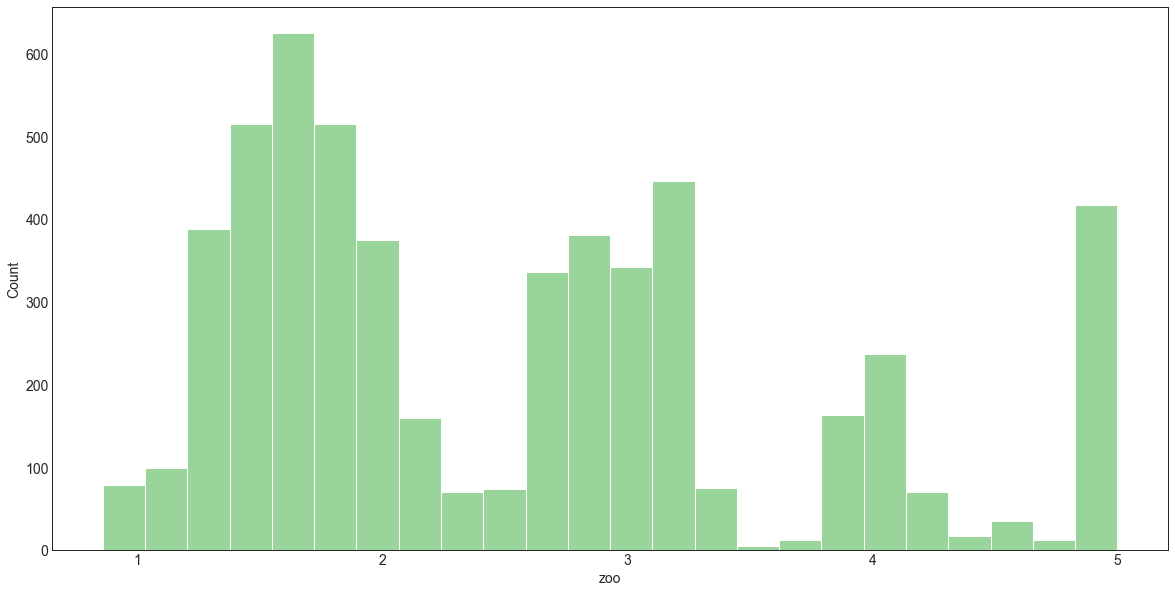

In [17]:
sns.histplot(
    x = 'zoo',
    data = df,
    color = sns.color_palette("YlGn", 1)
)
plt.show()

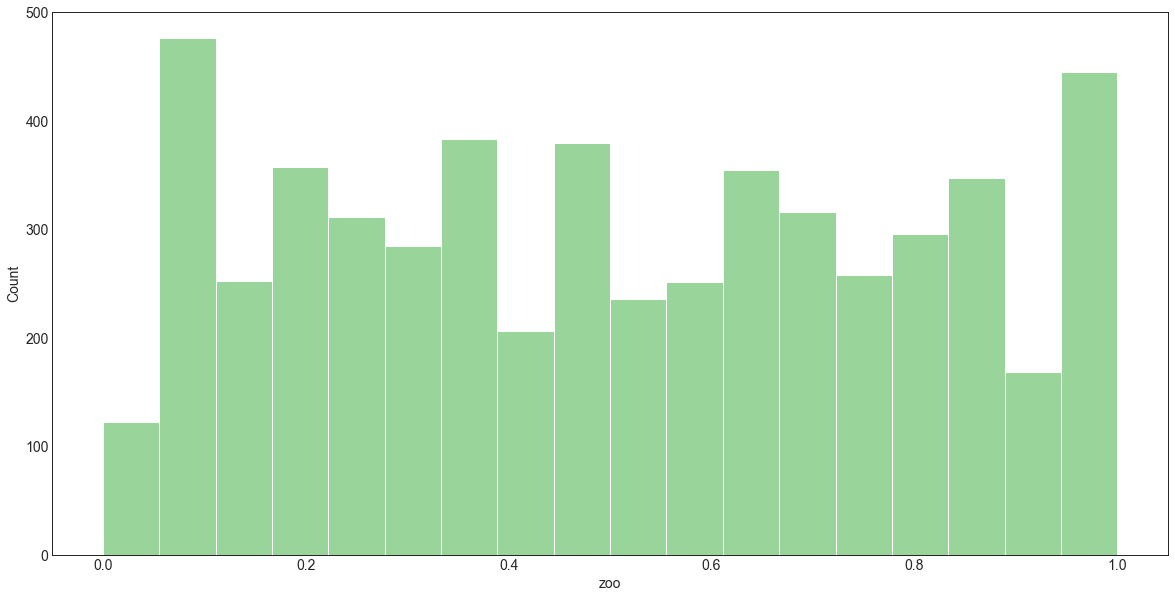

In [14]:
sns.histplot(
    x = 'zoo',
    data = test_features,
    color = sns.color_palette("YlGn", 1)
)
plt.show()

### Scaling all our features

In [18]:
#so we scale all our features, let's look how do they distributed after it and did it help to us

for column in df.columns:
    qt = QuantileTransformer(n_quantiles=10, random_state=0)
    df[column] = qt.fit_transform(df[column].to_frame())

In [21]:
df.head()

,churches,resorts,beaches,parks,theatres,museums,malls,zoo,restaurants,pubs_bars,...,art_galleries,dance_clubs,swimming_pools,gyms,bakeries,beauty_spas,cafes,view_points,monuments,gardens
0,0.0,0.00000,0.816055,0.732861,1.0,0.581871,1.0,0.506944,0.319865,0.476190,...,0.62963,0.123457,0.108932,0.0,0.220044,0.0,0.0,0.0,0.0,0.0
1,0.0,0.00000,0.816055,0.732861,1.0,0.581871,1.0,0.559259,0.319865,0.481481,...,0.62963,0.123457,0.108932,0.0,0.220044,0.0,0.0,0.0,0.0,0.0
2,0.0,0.00000,0.816055,0.731284,1.0,0.581871,1.0,0.559259,0.319865,0.476190,...,0.62963,0.123457,0.108932,0.0,0.220044,0.0,0.0,0.0,0.0,0.0
3,0.0,0.06105,0.816055,0.731284,1.0,0.581871,1.0,0.506944,0.319865,0.476190,...,0.62963,0.123457,0.108932,0.0,0.220044,0.0,0.0,0.0,0.0,0.0
4,0.0,0.00000,0.816055,0.731284,1.0,0.581871,1.0,0.559259,0.319865,0.476190,...,0.62963,0.123457,0.108932,0.0,0.220044,0.0,0.0,0.0,0.0,0.0


### Looking on the results of the scaling(histograms)

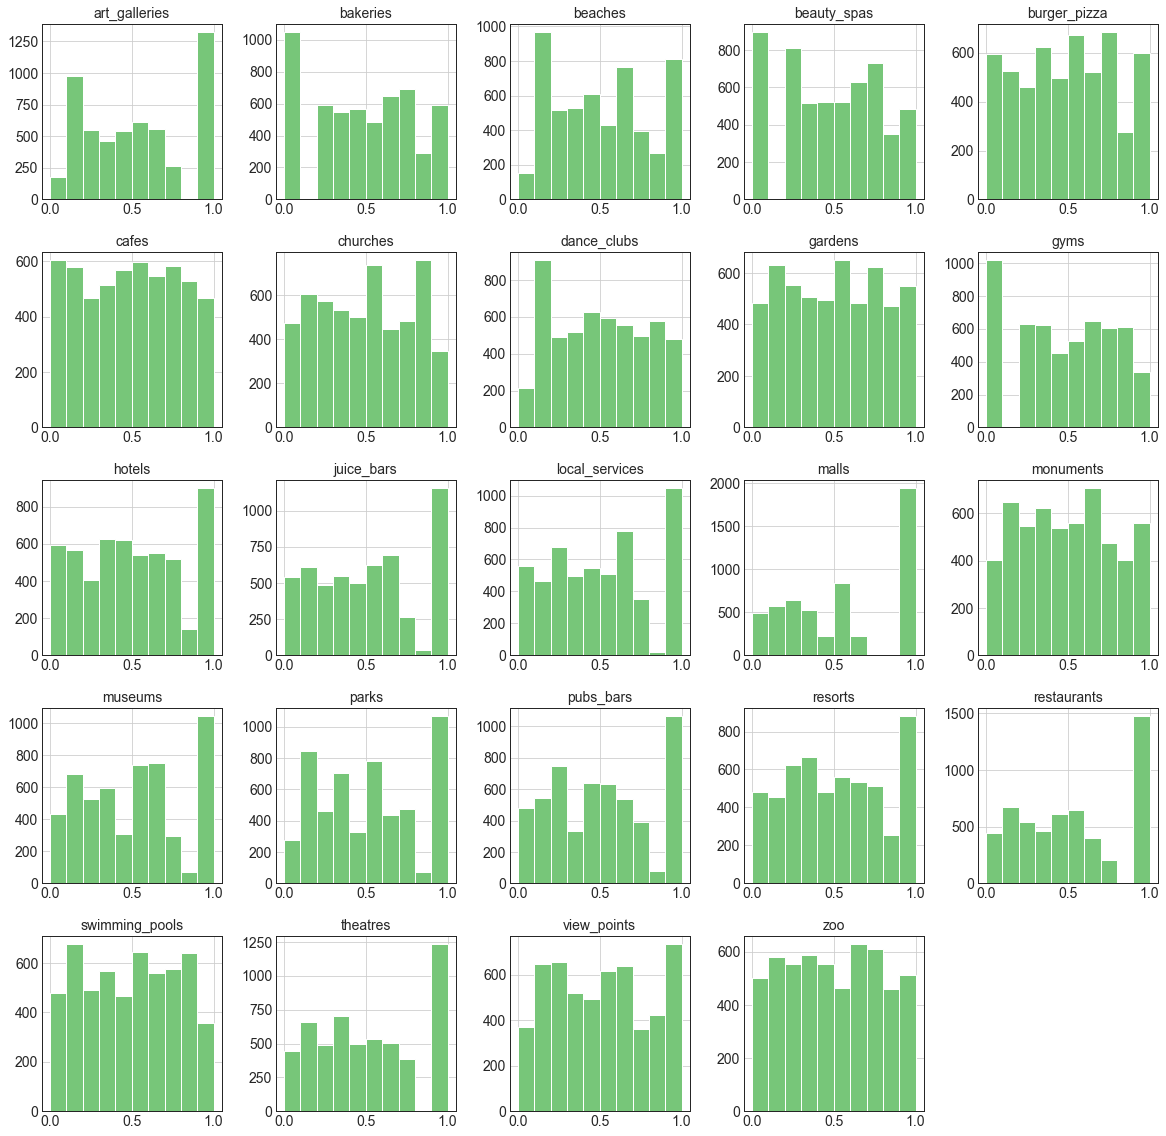

In [39]:
df.hist(figsize=(20, 20), color = sns.color_palette("YlGn", 1))
plt.show()

## Conclusion
We transformed our features and cleaned them up. So we can work with them now.

You may have some questions about why we don’t remove emissions by 5 and 0. If we look at our graphics, we see that many of our features look very similar. And you can see right through them which groups we have. We won’t deliberately take them out.

## Upload data

In [40]:
df.to_csv('data_for_clustering.csv')